<a href="https://colab.research.google.com/github/yongchenyen/Python/blob/main/FRM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入數據

In [ ]:
import pandas as pd
## 載入顧客數據
customer_data_df = pd.read_csv('/content/drive/MyDrive/Dataset/Customer_Data.csv')
## 顯示前面十筆數據
customer_data_df.head(10)

,Client_Id,Customer_name,Order_date,Age,Gender,Order_form_status,Monetary_Fish,Monetary_Turtle,Monetary_Elephant
0,1,Tom,2018/5/8,26,M,success,200.0,100.0,0.0
1,1,Tom,2018/5/8,26,M,success,300.0,0.0,800.0
2,1,Tom,2019/6/12,26,M,success,700.0,1000.0,0.0
3,2,Jen,2019/2/11,32,F,success,499.0,299.0,999.0
4,2,Jen,2019/3/12,32,F,fail,0.0,836.0,599.0
5,2,Jen,2019/5/13,32,F,success,600.0,0.0,0.0
6,2,Jen,2020/7/14,32,F,success,400.0,0.0,1200.0
7,3,Ken,2020/5/15,40,M,success,0.0,999.0,999.0
8,3,Ken,2020/5/15,40,M,success,700.0,NaN,600.0
9,4,Louis,2019/2/17,22,F,success,499.0,299.0,699.0


#檢視訂單的狀態

In [ ]:
## 查看訂單狀態有哪些屬性
customer_data_df['Order_form_status'].unique()

array(['success', 'fail'], dtype=object)

In [ ]:
## 只保留訂單狀態(Order_form_status)為成功(success)的訂單
customer_data_df = customer_data_df.loc[customer_data_df['Order_form_status'] == 'success', :]
## 查看一下拿掉fail的訂單後，還剩幾筆資料
print('成立的訂單數量: ', len(customer_data_df))

成立的訂單數量:  43


In [ ]:
## 查看一下數據資訊，檢查是否有一些沒有數據的欄位
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 48
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Client_Id          43 non-null     int64  
 1   Customer_name      43 non-null     object 
 2   Order_date         43 non-null     object 
 3   Age                43 non-null     int64  
 4   Gender             43 non-null     object 
 5   Order_form_status  43 non-null     object 
 6   Monetary_Fish      42 non-null     float64
 7   Monetary_Turtle    42 non-null     float64
 8   Monetary_Elephant  43 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.4+ KB


Recency

In [ ]:
## 根據顧客的id來分組，得到他們距離現在最近一次的購買時間點
Recency_df = customer_data_df.groupby('Client_Id')['Order_date'].max().reset_index()
Recency_df

,Client_Id,Order_date
0,1,2019/6/12
1,2,2020/7/14
2,3,2020/5/15
3,4,2020/5/21
4,5,2020/5/25
5,6,2020/7/20
6,7,2020/6/4
7,8,2020/6/9
8,9,2020/6/17
9,10,2020/6/28


In [ ]:
## 獲取今天日期
import datetime
now = datetime.date.today()
## 計算距離今天幾天
Recency_df['Recency'] = (pd.to_datetime(now) - pd.to_datetime(Recency_df['Order_date'])).dt.days
## 查看dataframe
Recency_df

,Client_Id,Order_date,Recency
0,1,2019/6/12,1567
1,2,2020/7/14,1169
2,3,2020/5/15,1229
3,4,2020/5/21,1223
4,5,2020/5/25,1219
5,6,2020/7/20,1163
6,7,2020/6/4,1209
7,8,2020/6/9,1204
8,9,2020/6/17,1196
9,10,2020/6/28,1185


Frequency

In [ ]:
from pandas.core.generic import Frequency
## 增加一行日期標籤幫助我們接下來的計算，原本Order_date這個欄位會被我們當成是計算次數的欄位
customer_data_df['Date_Tag'] = customer_data_df['Order_date'].astype(str)
## 把同一天消費的訂單合併在一起，等等要忽略掉
dd_Frequency = customer_data_df.groupby(['Client_Id', 'Date_Tag'])['Order_date'].count().reset_index()
## 計算同一個客人在不同日期消費的次數
Frequency_df = dd_Frequency.groupby('Client_Id')['Order_date'].count().reset_index()
## 重新命名Order_date為Frequency
Frequency_df = Frequency_df.rename(columns = {'Client_Id': 'Client_Id', 'Order_date': 'Frequency'})

Frequency_df

<ipython-input-24-18caa562c835>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_df['Date_Tag'] = customer_data_df['Order_date'].astype(str)


,Client_Id,Frequency
0,1,2
1,2,3
2,3,1
3,4,4
4,5,3
5,6,5
6,7,3
7,8,6
8,9,5
9,10,7


Monetary

In [ ]:
## 根據顧客ID來計算個別顧客消費Fish品項的總額
Monetary_Fish= pd.DataFrame(customer_data_df.groupby('Client_Id')['Monetary_Fish'].sum().reset_index())
## 重新命名列名
Monetary_Fish = Monetary_Fish.rename(columns={'Client_Id':'Client_Id','Monetary_Fish':'Monetary_sum'})

Monetary_Fish

,Client_Id,Monetary_sum
0,1,1200.0
1,2,1499.0
2,3,700.0
3,4,2897.0
4,5,1498.0
5,6,2199.0
6,7,1198.0
7,8,899.0
8,9,3097.0
9,10,2399.0


合併 Monetary 與 Frequency

In [ ]:
## 合併 Monetary 與 Frequency
new_df = pd.merge(Monetary_Fish, Frequency_df, right_on='Client_Id', left_on='Client_Id')
## 計算個別顧客平均消費總額
new_df['Monetary'] = round(new_df['Monetary_sum'] / new_df['Frequency'])
## 合併最後一個欄位Recency
new_customer_data_df = pd.merge(new_df, Recency_df, right_on='Client_Id', left_on='Client_Id')
## 我們只需要RFM所需的數據
new_customer_data_df = new_customer_data_df[['Client_Id', 'Recency', 'Frequency', 'Monetary']]

new_customer_data_df

,Client_Id,Recency,Frequency,Monetary
0,1,1567,2,600.0
1,2,1169,3,500.0
2,3,1229,1,700.0
3,4,1223,4,724.0
4,5,1219,3,499.0
5,6,1163,5,440.0
6,7,1209,3,399.0
7,8,1204,6,150.0
8,9,1196,5,619.0
9,10,1185,7,343.0


將數據打分，區分等級

bins: 切割區間，最後一個值故意弄很大，代表無限大

In [ ]:
## 幫Recency區分等級
new_customer_data_df['Recency_Level'] = pd.cut(new_customer_data_df['Recency'], bins=[0,40,80,120,160,1000000], labels=[5,4,3,2,1], right=False).astype(float)
## 幫Frequency區分等級
new_customer_data_df['Frequency_Level'] = pd.cut(new_customer_data_df['Frequency'], bins=[1,2,3,4,5,1000000], labels=[1,2,3,4,5], right=False).astype(float)
## 幫Monetary區分等級
new_customer_data_df['Monetary_Level'] = pd.cut(new_customer_data_df['Monetary'], bins=[0,40,80,120,160,1000000], labels=[1,2,3,4,5], right=False).astype(float)

new_customer_data_df

,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level
0,1,1567,2,600.0,1.0,2.0,5.0
1,2,1169,3,500.0,1.0,3.0,5.0
2,3,1229,1,700.0,1.0,1.0,5.0
3,4,1223,4,724.0,1.0,4.0,5.0
4,5,1219,3,499.0,1.0,3.0,5.0
5,6,1163,5,440.0,1.0,5.0,5.0
6,7,1209,3,399.0,1.0,3.0,5.0
7,8,1204,6,150.0,1.0,5.0,4.0
8,9,1196,5,619.0,1.0,5.0,5.0
9,10,1185,7,343.0,1.0,5.0,5.0


Step 10: 定義我們的顧客分群

八個組合: (0,0,0、(1,0,0)~(1,1,1) 分別代別了一種客戶群

將指標值大於平均值的定義為1，反之為0

In [ ]:
new_customer_data_df['New_Recency'] = (new_customer_data_df['Recency_Level'] > new_customer_data_df['Recency_Level'].mean())*1

new_customer_data_df['New_Frequency'] = (new_customer_data_df['Frequency_Level'] > new_customer_data_df['Frequency_Level'].mean())*1

new_customer_data_df['New_Monetary'] = (new_customer_data_df['Monetary_Level'] > new_customer_data_df['Monetary_Level'].mean())*1

new_customer_data_df

,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level,New_Recency,New_Frequency,New_Monetary
0,1,1567,2,600.0,1.0,2.0,5.0,0,0,1
1,2,1169,3,500.0,1.0,3.0,5.0,0,0,1
2,3,1229,1,700.0,1.0,1.0,5.0,0,0,1
3,4,1223,4,724.0,1.0,4.0,5.0,0,1,1
4,5,1219,3,499.0,1.0,3.0,5.0,0,0,1
5,6,1163,5,440.0,1.0,5.0,5.0,0,1,1
6,7,1209,3,399.0,1.0,3.0,5.0,0,0,1
7,8,1204,6,150.0,1.0,5.0,4.0,0,1,0
8,9,1196,5,619.0,1.0,5.0,5.0,0,1,1
9,10,1185,7,343.0,1.0,5.0,5.0,0,1,1


顧客分群

In [ ]:
## 組合欄位
new_customer_data_df['Customer_Group_value'] = new_customer_data_df['New_Recency']*100 + new_customer_data_df['New_Frequency']*10 + new_customer_data_df['New_Monetary']
## 顯示數據
new_customer_data_df

## 定義分群標準
def customer_group(value):
    if value == 111:
        label = '最重要的顧客'
    elif value == 110:
        label = '未來有消費潛力的顧客'
    elif value == 101:
        label = '消費頻率較低的顧客'
    elif value == 100:
        label = '新顧客'
    elif value == 11:
        label = '近期流失的重要顧客'
    elif value == 10:
        label = '普通顧客'
    elif value == 1:
        label = '流失掉的高消費顧客'
    elif value == 0:
        label = '不是我們的客群'

    return label

## 將Gender 和 Age 合併回去
Gender_df = customer_data_df.groupby('Client_Id')['Gender'].max().reset_index()
Age_df = customer_data_df.groupby('Client_Id')['Age'].max().reset_index()
new_customer_data_df = pd.merge(new_customer_data_df, Gender_df, right_on='Client_Id', left_on='Client_Id')
new_customer_data_df = pd.merge(new_customer_data_df, Age_df, right_on='Client_Id', left_on='Client_Id')

## 顧客分群
new_customer_data_df['RFM_顧客分群結果'] = new_customer_data_df['Customer_Group_value'].apply(customer_group)

## 將數據保存為csv檔
new_customer_data_df.to_csv('RFM_Model_Result.csv', encoding='utf_8_sig')

## 顯示數據
new_customer_data_df

,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,Gender,Age,RFM_顧客分群結果
0,1,1567,2,600.0,1.0,2.0,5.0,0,0,1,1,M,26,流失掉的高消費顧客
1,2,1169,3,500.0,1.0,3.0,5.0,0,0,1,1,F,32,流失掉的高消費顧客
2,3,1229,1,700.0,1.0,1.0,5.0,0,0,1,1,M,40,流失掉的高消費顧客
3,4,1223,4,724.0,1.0,4.0,5.0,0,1,1,11,F,22,近期流失的重要顧客
4,5,1219,3,499.0,1.0,3.0,5.0,0,0,1,1,M,42,流失掉的高消費顧客
5,6,1163,5,440.0,1.0,5.0,5.0,0,1,1,11,M,30,近期流失的重要顧客
6,7,1209,3,399.0,1.0,3.0,5.0,0,0,1,1,F,34,流失掉的高消費顧客
7,8,1204,6,150.0,1.0,5.0,4.0,0,1,0,10,M,26,普通顧客
8,9,1196,5,619.0,1.0,5.0,5.0,0,1,1,11,F,38,近期流失的重要顧客
9,10,1185,7,343.0,1.0,5.0,5.0,0,1,1,11,M,32,近期流失的重要顧客


# 資料視覺化

## 方法一: 我們可以看看這RFM Model三個指維度，我們的數據是如何呈現的

導入數據

In [ ]:
## import package
import pandas as pd
## load in the data and transform to DataFrame
data_visual_df = pd.read_csv('RFM_Model_Result.csv')
## show the data
data_visual_df

,Unnamed: 0,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,Gender,Age,RFM_顧客分群結果
0,0,1,1567,2,600.0,1.0,2.0,5.0,0,0,1,1,M,26,流失掉的高消費顧客
1,1,2,1169,3,500.0,1.0,3.0,5.0,0,0,1,1,F,32,流失掉的高消費顧客
2,2,3,1229,1,700.0,1.0,1.0,5.0,0,0,1,1,M,40,流失掉的高消費顧客
3,3,4,1223,4,724.0,1.0,4.0,5.0,0,1,1,11,F,22,近期流失的重要顧客
4,4,5,1219,3,499.0,1.0,3.0,5.0,0,0,1,1,M,42,流失掉的高消費顧客
5,5,6,1163,5,440.0,1.0,5.0,5.0,0,1,1,11,M,30,近期流失的重要顧客
6,6,7,1209,3,399.0,1.0,3.0,5.0,0,0,1,1,F,34,流失掉的高消費顧客
7,7,8,1204,6,150.0,1.0,5.0,4.0,0,1,0,10,M,26,普通顧客
8,8,9,1196,5,619.0,1.0,5.0,5.0,0,1,1,11,F,38,近期流失的重要顧客
9,9,10,1185,7,343.0,1.0,5.0,5.0,0,1,1,11,M,32,近期流失的重要顧客


3D圖建立

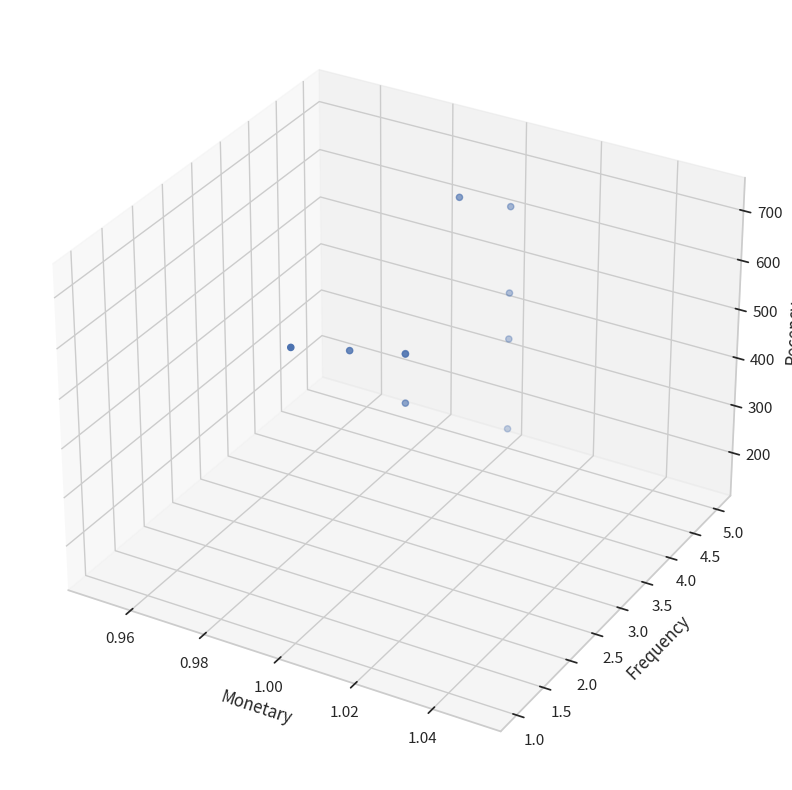

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = data_visual_df["Recency_Level"].values.tolist()
y = data_visual_df["Frequency_Level"].values.tolist()
z = data_visual_df["Monetary"].values.tolist()
fig = plt.figure(figsize=(10, 10))

## 建立3D圖
ax = plt.subplot(projection='3d')
## 將數據畫上
ax.scatter(x, y, z, c='b')
## 設定座標軸名稱
ax.set_zlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_xlabel('Monetary')

plt.show()
plt.close()

## 方法二: 看兩個指標，對顧客屬性的影響

導入數據

In [ ]:
## 導入上一篇建立好RFM模型的數據，也就是上一篇最後的產出csv檔

## import package
import pandas as pd
## load in the data and transform to DataFrame
data_visual_df = pd.read_csv('RFM_Model_Result.csv')
## show the data
data_visual_df

,Unnamed: 0,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,Gender,Age,RFM_顧客分群結果
0,0,1,1567,2,600.0,1.0,2.0,5.0,0,0,1,1,M,26,流失掉的高消費顧客
1,1,2,1169,3,500.0,1.0,3.0,5.0,0,0,1,1,F,32,流失掉的高消費顧客
2,2,3,1229,1,700.0,1.0,1.0,5.0,0,0,1,1,M,40,流失掉的高消費顧客
3,3,4,1223,4,724.0,1.0,4.0,5.0,0,1,1,11,F,22,近期流失的重要顧客
4,4,5,1219,3,499.0,1.0,3.0,5.0,0,0,1,1,M,42,流失掉的高消費顧客
5,5,6,1163,5,440.0,1.0,5.0,5.0,0,1,1,11,M,30,近期流失的重要顧客
6,6,7,1209,3,399.0,1.0,3.0,5.0,0,0,1,1,F,34,流失掉的高消費顧客
7,7,8,1204,6,150.0,1.0,5.0,4.0,0,1,0,10,M,26,普通顧客
8,8,9,1196,5,619.0,1.0,5.0,5.0,0,1,1,11,F,38,近期流失的重要顧客
9,9,10,1185,7,343.0,1.0,5.0,5.0,0,1,1,11,M,32,近期流失的重要顧客


Step2 : 可視化

這邊就分別展示使用Recency_Level和Frequency_Level當維度對顧客年齡層與性別的影響

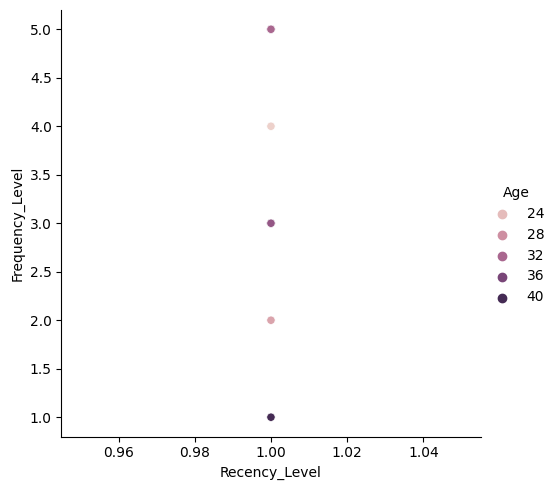

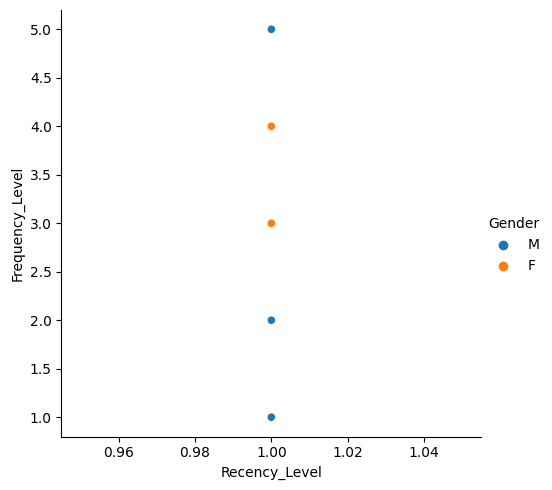

In [ ]:
## impot package
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Recency_Level', y='Frequency_Level', hue='Age', data=data_visual_df)
sns.relplot(x='Recency_Level', y='Frequency_Level', hue='Gender', data=data_visual_df)

## 方法三: FacetGrid
a. 我們使用FacetGrid這個方法，快速的製圖

b. 視覺化圖片由一個大圖裡面包含很多小圖

Step 1: 導入數據

In [ ]:
## import package
import pandas as pd
## load in the data and transform to DataFrame
data_visual_df = pd.read_csv('RFM_Model_Result.csv')
## show the data
data_visual_df

,Unnamed: 0,Client_Id,Recency,Frequency,Monetary,Recency_Level,Frequency_Level,Monetary_Level,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,Gender,Age,RFM_顧客分群結果
0,0,1,1567,2,600.0,1.0,2.0,5.0,0,0,1,1,M,26,流失掉的高消費顧客
1,1,2,1169,3,500.0,1.0,3.0,5.0,0,0,1,1,F,32,流失掉的高消費顧客
2,2,3,1229,1,700.0,1.0,1.0,5.0,0,0,1,1,M,40,流失掉的高消費顧客
3,3,4,1223,4,724.0,1.0,4.0,5.0,0,1,1,11,F,22,近期流失的重要顧客
4,4,5,1219,3,499.0,1.0,3.0,5.0,0,0,1,1,M,42,流失掉的高消費顧客
5,5,6,1163,5,440.0,1.0,5.0,5.0,0,1,1,11,M,30,近期流失的重要顧客
6,6,7,1209,3,399.0,1.0,3.0,5.0,0,0,1,1,F,34,流失掉的高消費顧客
7,7,8,1204,6,150.0,1.0,5.0,4.0,0,1,0,10,M,26,普通顧客
8,8,9,1196,5,619.0,1.0,5.0,5.0,0,1,1,11,F,38,近期流失的重要顧客
9,9,10,1185,7,343.0,1.0,5.0,5.0,0,1,1,11,M,32,近期流失的重要顧客


Step 2: 導入畫圖的套件

由於我們的圖會有用到中文字的地方，所以我們要先設定讓中文能顯示在圖上

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-09-26 13:18:56--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.139, 172.253.122.113, 172.253.122.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tohtc3fonj9p7r5tjgnamtm33pb0pq2g/1695734325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e5e52b8e-96d1-4495-9194-665d59ccf49f [following]
--2023-09-26 13:19:00--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tohtc3fonj9p7r5tjgnamtm33pb0pq2g/1695734325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e5e52b8e-96d1-4495-9194-665d59ccf49f
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to do

In [ ]:
## impot package
import matplotlib.pyplot as plt
import seaborn as sns

#圖片顯示中文字體
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Step 3: 製作大圖

這邊是設定指標消費頻率(Frequency)為x軸，指標上一次消費距離今天天數(Recency)為Y軸

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


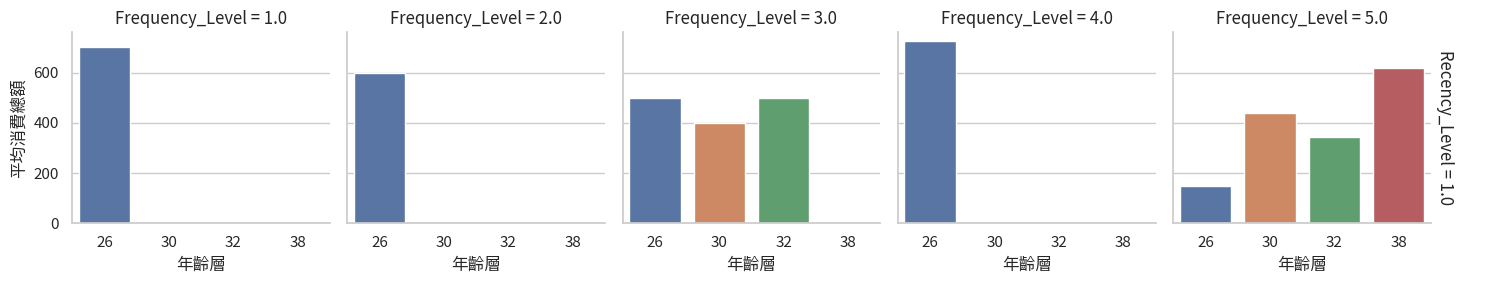

In [ ]:
## impot package
import matplotlib.pyplot as plt
import seaborn as sns

#圖片顯示中文字體
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 建立大圖
data_visual = sns.FacetGrid(data_visual_df,
  col = "Frequency_Level", ## 行, X軸
  row = "Recency_Level", ## 列, Y軸
  #size = 4,
  #aspect = 0.5,
  margin_titles = True)
## Step 4: 製作小圖
## a. 我這邊想分析年齡層與消費總額的圖，大家可以根據自己的需求更改， 像是你鄉分析性別與消費總額等, 只咬顧客資料收的越多，可以組合出來的圖也越多，像是可以收學歷、年薪、身高、體重等
## b. 顏色可以從 deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind'裡面做更換喔，或是可以自己查詢更多搭配方式
## c. 圖形也可以畫成散點圖跟折線圖喔!! 將sns.barplot 改成plt.scatter或 plt.plot, 然後把palette = sns.color_palette("deep")拿掉，就可以囉
# ## 建立小圖
data_visual = data_visual.map(sns.barplot, # 圖形選擇 plt.scatter plt.plot
 'Age', # 小圖表X資料來源
 'Monetary', # 小圖表Y資料來源
 ## 顏色調整
 palette = sns.color_palette("deep") ## ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
 )
## 設定小圖X軸、Y軸名稱
data_visual = data_visual.set_axis_labels('年齡層','平均消費總額').add_legend()

其他組合

載入中文字體

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-09-26 13:27:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.101, 172.253.122.100, 172.253.122.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dkioh78j3a03l9p3p4fk37l8tts4qlb4/1695734850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=48e649b4-ad9c-467d-b6fd-10eaf0180455 [following]
--2023-09-26 13:27:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dkioh78j3a03l9p3p4fk37l8tts4qlb4/1695734850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=48e649b4-ad9c-467d-b6fd-10eaf0180455
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to do

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


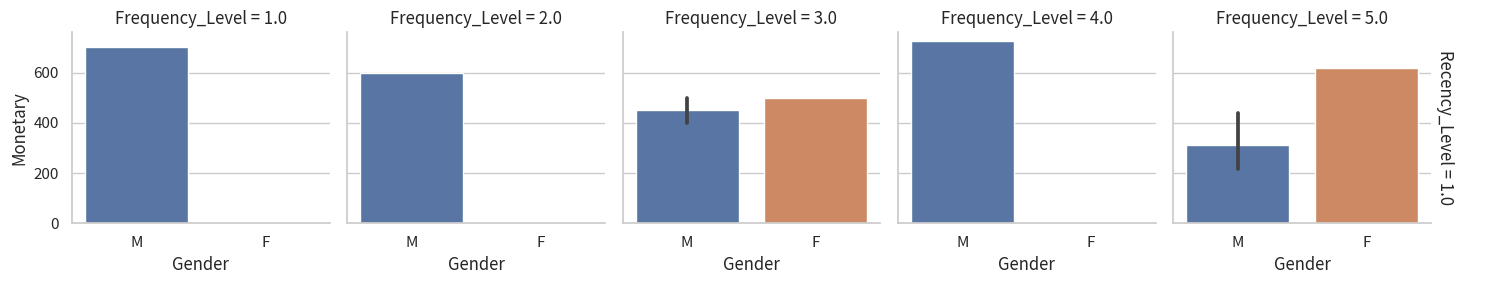

In [ ]:
# 資料視覺化

## 載入套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 圖片顯示中文字體
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 讀取資料
data_visual_df = pd.read_csv('RFM_Model_Result.csv')
## 讀出資料
data_visual_df

# 建立大圖
data_visual = sns.FacetGrid(data_visual_df,
  col = 'Frequency_Level',
  row = 'Recency_Level',
  margin_titles=True)

# 建立小圖
data_visual = data_visual.map(sns.barplot,
  'Gender',
  'Monetary',
  palette = sns.color_palette('deep') ## ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
  )

## 設定小圖X軸、Y軸名稱
data_visual = data_visual.set_axis_labels('Gender', 'Monetary').add_legend()